# 最適化アルゴリズムの数値検証

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import algo_GD
import model_opt

_fontsize = "xx-large"
_cmap = cm.jet

### 二次関数

In [2]:
# Setup
_t_max = 50
_stepfix = 1.9
f = model_opt.Quadratic1D(shift=0.0, scale=0.5)

In [3]:
# Initiate algorithm.
step = lambda t, model, data, newdir : _stepfix
w_init = np.array([1.69], dtype=np.float32).reshape((1,1))
algo = algo_GD.GD_Optim(w_init=w_init, step=step, t_max=_t_max, store=True)

In [4]:
# Run algorithm.
for onestep in algo:
    algo.update(model=f, data=None)

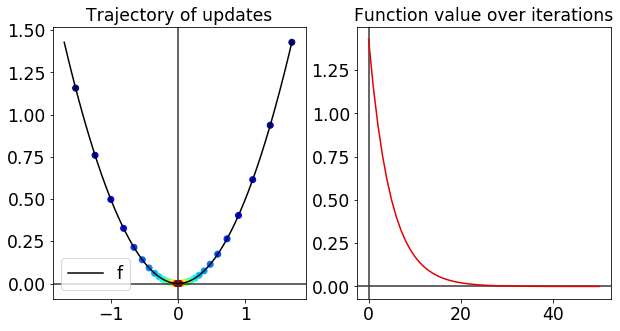

In [5]:
# Visualize performance.
x_range = np.linspace(-np.abs(w_init[0,0]), np.abs(w_init[0,0]), 250)
x_vals = algo.wstore[0,:]
y_vals = f(x_vals)
y_f = f(x_range)
t_steps = np.arange(0,_t_max+1, 1)


myfig = plt.figure(figsize=(10,5))

ax1 = myfig.add_subplot(1,2,1)
plt.title("Trajectory of updates", fontsize=_fontsize)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, y_f, color="xkcd:black", label="f")
ax1.tick_params(labelsize=_fontsize)
c = np.linspace(0, 10, x_vals.size)
#ax1.plot(x_vals, y_vals, color="xkcd:red") # to connect points.
ax1.legend(loc="best", ncol=1, fontsize=_fontsize)
ax1.scatter(x_vals, y_vals, c=c, cmap=_cmap)

ax2 = myfig.add_subplot(1,2,2)
plt.title("Function value over iterations", fontsize=_fontsize)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax2.plot(t_steps, y_vals, color="xkcd:red")
ax2.tick_params(labelsize=_fontsize)

plt.show()

### 別の凸関数

In [6]:
# Setup
_t_max = 50
_stepfix = 0.1
f = model_opt.Poly15(shift=0.0, scale=2/3)

In [7]:
# Initiate algorithm.
step = lambda t, model, data, newdir : _stepfix
w_init = np.array([1.69], dtype=np.float32).reshape((1,1))
algo = algo_GD.GD_Optim(w_init=w_init, step=step, t_max=_t_max, store=True)

In [8]:
# Run algorithm.
for onestep in algo:
    algo.update(model=f, data=None)

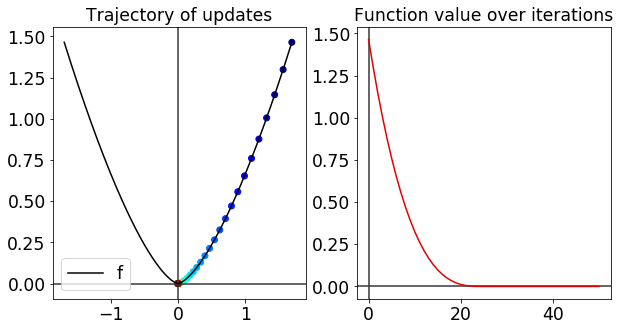

In [9]:
# Visualize performance.
x_range = np.linspace(-np.abs(w_init[0,0]), np.abs(w_init[0,0]), 250)
x_vals = algo.wstore[0,:]
y_vals = f(x_vals)
y_f = f(x_range)
t_steps = np.arange(0,_t_max+1, 1)


myfig = plt.figure(figsize=(10,5))

ax1 = myfig.add_subplot(1,2,1)
plt.title("Trajectory of updates", fontsize=_fontsize)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, y_f, color="xkcd:black", label="f")
ax1.tick_params(labelsize=_fontsize)
c = np.linspace(0, 10, x_vals.size)
#ax1.plot(x_vals, y_vals, color="xkcd:red") # to connect points.
ax1.legend(loc="best", ncol=1, fontsize=_fontsize)
ax1.scatter(x_vals, y_vals, c=c, cmap=_cmap)

ax2 = myfig.add_subplot(1,2,2)
plt.title("Function value over iterations", fontsize=_fontsize)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax2.plot(t_steps, y_vals, color="xkcd:red")
ax2.tick_params(labelsize=_fontsize)

plt.show()

In [10]:
print(algo.wstore)

[[ 1.6900001e+00  1.5600001e+00  1.4351001e+00  1.3153044e+00
   1.2006177e+00  1.0910450e+00  9.8659194e-01  8.8726461e-01
   7.9306990e-01  7.0401543e-01  6.2010980e-01  5.4136276e-01
   4.6778542e-01  3.9939058e-01  3.3619320e-01  2.7821103e-01
   2.2546531e-01  1.7798212e-01  1.3579419e-01  9.8943919e-02
   6.7488566e-02  4.1510001e-02  2.1135995e-02  6.5977694e-03
  -1.5248973e-03  2.3800961e-03 -2.4985273e-03  2.4999997e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03  2.5000002e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03  2.5000002e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03  2.5000002e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03  2.5000002e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03  2.5000002e-03
  -2.5000002e-03  2.5000002e-03 -2.5000002e-03]]


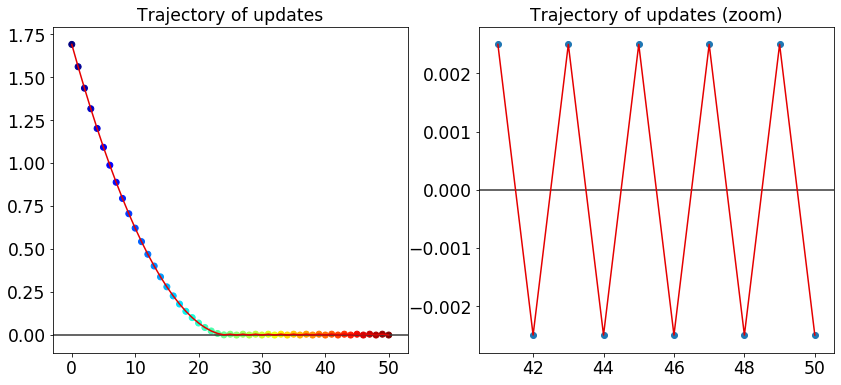

In [11]:
myfig = plt.figure(figsize=(14,6))

ax1 = myfig.add_subplot(1,2,1)
plt.title("Trajectory of updates", fontsize=_fontsize)
plt.axhline(y=0.0, color="xkcd:dark grey")
ax1.tick_params(labelsize=_fontsize)
c = np.linspace(0, 10, x_vals.size)
ax1.plot(t_steps, x_vals, color="xkcd:red") # to connect points.
ax1.scatter(t_steps, x_vals, c=c, cmap=_cmap)

if t_steps.size > 10:
    zoom_idx = 10
else:
    zoom_idx = t_steps.size

ax2 = myfig.add_subplot(1,2,2)
plt.title("Trajectory of updates (zoom)", fontsize=_fontsize)
plt.axhline(y=0.0, color="xkcd:dark grey")
ax2.tick_params(labelsize=_fontsize)
c = np.linspace(0, 10, zoom_idx)
ax2.plot(t_steps[-zoom_idx:], x_vals[-zoom_idx:], color="xkcd:red") # to connect points.
ax2.scatter(t_steps[-zoom_idx:], x_vals[-zoom_idx:])

plt.show()

___